# Script for Analyzing Sensitivity @ Query and Matched Protein Level

In [51]:
import sys

## Extract all valid BLAST alignment

In [75]:
"""
This script extracts all BLAST alignment that report E-value <= 1e-5
"""

# Dictionary object to keep track all query name and best mapped protein
BLAST = {}

# A counter that appends to the end of query name, to de-duplicate 
num_processed = 0

# Read the file
with open('test.out', 'r') as f:

    while True:
        
        line = f.readline()
        
        # If EOF, exists the infinite loop
        if len(line) == 0:
            break
            
        # If encounter a query annotation block
        if len(line) >= 6 and 'Query=' == line[:6]:
            
            # Query name
            name   = line.strip().split(' ')[1]
            
            # Skip through all decorative lines
            empty  = f.readline()
            length = f.readline()
            header = f.readline()
            
            # If header is empty, this query fail to map to anything
            if header.strip() == "":
                num_processed += 1
                continue
                
            # Skip through all decorative lines
            header = f.readline()
            spacer = f.readline()
            entry  = f.readline()
            
            # Tokenize the first entry (best mapped)
            toks   = entry.strip().split(' ')
            
            # E value
            e_val  = float(toks[-1])
            
            # Corresponding protein
            id_prot= toks[0]
            
            # If the match is significant
            if e_val < 1e-5:
                BLAST[f"{name}_{num_processed}"] = [id_prot]
                
                # If the second best match has the same e_val, include it as well
                toks  = f.readline().strip().split(' ')
                try:
                    e_val2= float(toks[-1])
                    if e_val2 == e_val:
                        BLAST[f"{name}_{num_processed}"].append(toks[0])
                except ValueError:
                    pass
                        
            # Increment counter to de-duplicate query names
            num_processed += 1

            if num_processed % 100000 == 0:
                print(f"Processed {num_processed}")

Processed 100000
Processed 200000
Processed 300000
Processed 400000
Processed 500000
Processed 600000


In [76]:
print(f"BLAST found matches for {len(BLAST)} querys")

BLAST found matches for 646528 querys


## Extract all valid Bowtie2 alignment

In [77]:
# A dictionary object to keep track mapped BOWTIE2 object
BOWTIE2 = {}

# Open the Filtered Sam file (contains only mapped querys)
with open("gQ23IRL96296_nt_encoded.sam", "r") as f:
    
    while True:
        
        # Read a line
        line = f.readline().strip()
        
        # If EOF, exists
        if len(line) == 0:
            break
            
        # Tokenize a SAM record
        toks = line.split('\t')
        
        # Query name
        name = toks[0].split('&*#')[0]
        
        # The mapped record
        match= toks[2]
        
        # Populate the dictionary
        if name not in BOWTIE2:
            BOWTIE2[name] = []
            
        # Keep track of all matched protein
        BOWTIE2[name].append(match)

In [101]:
print(f"BOWTIE2 found matches for {len(BOWTIE2)} querys")

BOWTIE2 found matches for 379322 querys


In [78]:
"""
The number of BOWTIE2 query found matches,
that BLAST also found.
"""
query_intersection = 0

for mapped in BLAST:
    if mapped in BOWTIE2:
        query_intersection += 1
        
print(f"Query level intersection is {query_intersection}/{len(BLAST)}")

Query level intersection is 374926/646528


In [79]:
"""
The number of BOWTIE2 query that found the same matches
as BLAST did.
"""
recover_intersection = 0

# For all BLAST matched query
for mapped in BLAST:
    
    # See if BOWTIE2 has it
    if mapped in BOWTIE2:
        
        # If BLAST and BOWTIE2 share a matched protein, count it!
        for p in BLAST[mapped]:
            if p in BOWTIE2[mapped]:
                
                recover_intersection += 1
        
print(f"Recovered matches = {recover_intersection}/{len(BLAST)}")

Recovered matches = 298558/646528


## Distribution of BOWTIE2 identified Protein Match

In [92]:
Protein_db = {'NP_056657.1': 'Influenza B virus (B/Lee/1940)',
'NP_056658.1': 'Influenza B virus (B/Lee/1940)',
'NP_056659.1': 'Influenza B virus (B/Lee/1940)',
'NP_056660.1': 'Influenza B virus (B/Lee/1940)',
'NP_056661.1': 'Influenza B virus (B/Lee/1940)',
'NP_056662.1': 'Influenza B virus (B/Lee/1940)',
'NP_056663.1': 'Influenza B virus (B/Lee/1940)',
'NP_056664.1': 'Influenza B virus (B/Lee/1940)',
'NP_056665.1': 'Influenza B virus (B/Lee/1940)',
'NP_056666.1': 'Influenza B virus (B/Lee/1940)',
'NP_057849.4': 'Human immunodeficiency virus 1',
'NP_057850.1': 'Human immunodeficiency virus 1',
'NP_057851.1': 'Human immunodeficiency virus 1',
'NP_057852.2': 'Human immunodeficiency virus 1',
'NP_057853.1': 'Human immunodeficiency virus 1',
'NP_057854.1': 'Human immunodeficiency virus 1',
'NP_057855.1': 'Human immunodeficiency virus 1',
'NP_057856.1': 'Human immunodeficiency virus 1',
'NP_057857.2': 'Human immunodeficiency virus 1',
'YP_009028572.1': 'Human immunodeficiency virus 1',
'YP_002790881.1': 'Zika virus',
'YP_009047202.1': 'Middle East respiratory syndrome-related coronavirus',
'YP_009047203.1': 'Middle East respiratory syndrome-related coronavirus',
'YP_009047204.1': 'Middle East respiratory syndrome-related coronavirus',
'YP_009047205.1': 'Middle East respiratory syndrome-related coronavirus',
'YP_009047206.1': 'Middle East respiratory syndrome-related coronavirus',
'YP_009047207.1': 'Middle East respiratory syndrome-related coronavirus',
'YP_009047208.1': 'Middle East respiratory syndrome-related coronavirus',
'YP_009047209.1': 'Middle East respiratory syndrome-related coronavirus',
'YP_009047210.1': 'Middle East respiratory syndrome-related coronavirus',
'YP_009047211.1': 'Middle East respiratory syndrome-related coronavirus',
'YP_009047212.1': 'Middle East respiratory syndrome-related coronavirus',
'YP_009118622.1': 'Influenza A virus (A/California/07/2009(H1N1))',
'YP_009118623.1': 'Influenza A virus (A/California/07/2009(H1N1))',
'YP_009118624.1': 'Influenza A virus (A/California/07/2009(H1N1))',
'YP_009118625.1': 'Influenza A virus (A/California/07/2009(H1N1))',
'YP_009118626.1': 'Influenza A virus (A/California/07/2009(H1N1))',
'YP_009118627.1': 'Influenza A virus (A/California/07/2009(H1N1))',
'YP_009118628.1': 'Influenza A virus (A/California/07/2009(H1N1))',
'YP_009118629.1': 'Influenza A virus (A/California/07/2009(H1N1))',
'YP_009118630.1': 'Influenza A virus (A/California/07/2009(H1N1))',
'YP_009118631.1': 'Influenza A virus (A/California/07/2009(H1N1))',
'YP_009121769.1': 'Influenza A virus (A/California/07/2009(H1N1))',
'YP_007188577.3': 'Betacoronavirus England 1',
'YP_007188578.1': 'Betacoronavirus England 1',
'YP_007188579.1': 'Betacoronavirus England 1',
'YP_007188580.1': 'Betacoronavirus England 1',
'YP_007188581.1': 'Betacoronavirus England 1',
'YP_007188582.1': 'Betacoronavirus England 1',
'YP_007188583.1': 'Betacoronavirus England 1',
'YP_007188584.1': 'Betacoronavirus England 1',
'YP_007188585.1': 'Betacoronavirus England 1',
'YP_007188586.1': 'Betacoronavirus England 1',
'YP_009944280.1': 'Betacoronavirus England 1',
'YP_009724389.1': 'Severe acute respiratory syndrome coronavirus 2',
'YP_009724390.1': 'Severe acute respiratory syndrome coronavirus 2',
'YP_009724391.1': 'Severe acute respiratory syndrome coronavirus 2',
'YP_009724392.1': 'Severe acute respiratory syndrome coronavirus 2',
'YP_009724393.1': 'Severe acute respiratory syndrome coronavirus 2',
'YP_009724394.1': 'Severe acute respiratory syndrome coronavirus 2',
'YP_009724395.1': 'Severe acute respiratory syndrome coronavirus 2',
'YP_009724396.1': 'Severe acute respiratory syndrome coronavirus 2',
'YP_009724397.2': 'Severe acute respiratory syndrome coronavirus 2',
'YP_009725255.1': 'Severe acute respiratory syndrome coronavirus 2',
'YP_009725295.1': 'Severe acute respiratory syndrome coronavirus 2',
'YP_009725318.1': 'Severe acute respiratory syndrome coronavirus 2'}

In [103]:
""" The number of protein fits found by BOWTIE2 querys """

protein_distribution = {}

for k,v in BOWTIE2.items():
    for protein in v:
        Virus = Protein_db[protein]
        if Virus not in protein_distribution:
            protein_distribution[Virus] = 0
        protein_distribution[Virus] += 1

print(protein_distribution)

{'Severe acute respiratory syndrome coronavirus 2': 397456, 'Middle East respiratory syndrome-related coronavirus': 173, 'Betacoronavirus England 1': 174}


## Analyze the CDS length distribution for all significant BLAST match (Exploratory Analysis)

In [54]:
qualified_aa_length = {}
num_processed = 0

# Open file
with open('test.out', 'r') as f:

    while True:
        
        # Read a line, until EOR, then exists
        line = f.readline()
        if len(line) == 0:
            break
           
        # Upon encountering a query block
        if len(line) >= 6 and 'Query=' == line[:6]:
            
            # Extract query name
            name   = line.strip().split(' ')[1]
            
            # Skip all decorative lines
            empty  = f.readline()
            length = f.readline()
            header = f.readline()
            
            # If the query has no match （***** No hits found *****)
            if header.strip() == "":
                num_processed += 1
                continue
                
            # Skip all decorative lines
            header = f.readline()
            spacer = f.readline()
            entry  = f.readline()
            
            # Tokenize the best record
            toks   = entry.strip().split(' ')
            
            # Extract E-value and matched protein name
            e_val  = float(toks[-1])
            id_prot= toks[0]
            
            # If the match is significant
            if e_val < 1e-5:
                BLAST[f"{name}_{num_processed}"] = id_prot
                
                # Keep traversing down 
                while True:
                    line = f.readline()
                    
                    # Until getting to the line that contains CDS length info
                    if 'Positives' in line:
                        
                        # Extract that CDS length info
                        identity = line.split(',')[1].split('=')[1].split(' ')[1]
                        vals = identity.split('/')
                        
                        # Populate dictionary
                        if int(vals[1]) not in qualified_aa_length:
                            qualified_aa_length[int(vals[1])] = 0
                        qualified_aa_length[int(vals[1])] += 1
                        break
                        
            num_processed += 1
            
            if num_processed % 100000 == 0:
                print(f"Processed {num_processed}")

Processed 100000
Processed 200000
Processed 300000
Processed 400000
Processed 500000
Processed 600000


In [56]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

In [80]:
""" Sort all possible CDS lengths and their corresponding count, for plot """
a, b = [], []
for k in sorted(qualified_aa_length.keys()):
    a.append(k)
    b.append(qualified_aa_length[k])

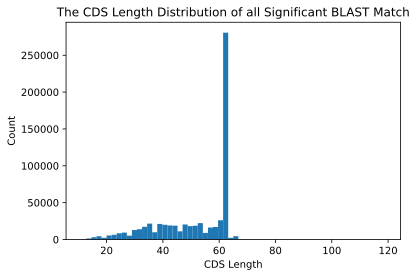

In [102]:
_ = plt.hist(a, weights=b, bins=60)
plt.xlabel("CDS Length")
plt.ylabel("Count")
plt.title("The CDS Length Distribution of all Significant BLAST Match")
plt.show()